In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

***Data Collection and Preparation***

In [7]:
df=pd.read_csv(r"heart.csv")

In [8]:
df.shape

(1025, 14)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
y=df.target
df.drop(columns=['target'] , inplace=True)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

***Splitting data to train and test***

In [13]:
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


In [15]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
943,65,1,0,120,177,0,1,140,0,0.4,2,0,3
302,55,0,1,132,342,0,1,166,0,1.2,2,0,2
503,45,0,1,130,234,0,0,175,0,0.6,1,0,2
222,64,1,3,110,211,0,0,144,1,1.8,1,0,2
518,49,1,2,120,188,0,1,139,0,2.0,1,3,3


<h2>SVM Model</h2>

***Model Training***

In [18]:
svclassifier = SVC(C= 100, gamma= 1, kernel='rbf')
svclassifier.fit(X_train,y_train)

SVC(C=100, gamma=1)

***Training and Testing Accuracy***

In [19]:
train_accuracy_svm = svclassifier.score(df, y)
print("Training Accuracy:", train_accuracy_svm)

test_accuracy_svm = svclassifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy_svm)

Training Accuracy: 1.0
Testing Accuracy: 1.0


***Cross Validation***

In [20]:
cv_scores_svm = cross_val_score(svclassifier, df, y, cv=5)
print("Cross-Validated Accuracy Scores:", cv_scores_svm)
print("Mean Cross-Validated Accuracy:", cv_scores_svm.mean())

Cross-Validated Accuracy Scores: [1.         0.98536585 0.97073171 1.         0.97073171]
Mean Cross-Validated Accuracy: 0.9853658536585366


***Learning Curve***

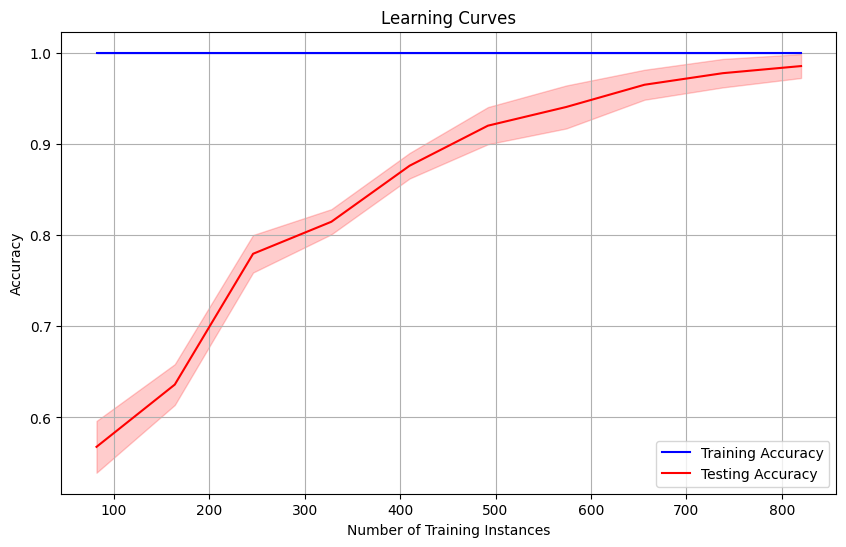

In [21]:
train_sizes, train_scores, test_scores = learning_curve(svclassifier, df, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

plt.title('Learning Curves')
plt.xlabel('Number of Training Instances')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

***Learning Curve for Loss***

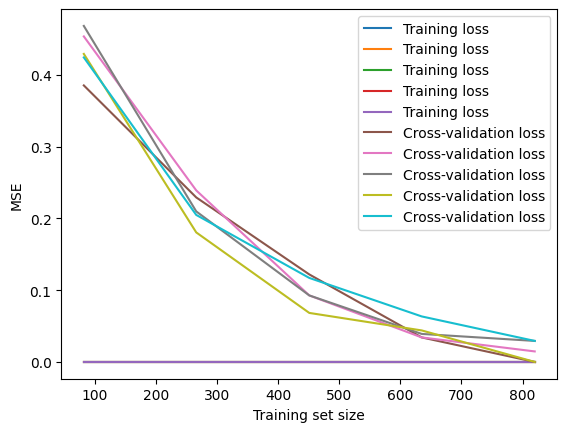

In [22]:
train_sizes, train_scores, test_scores = learning_curve(svclassifier, df, y, scoring="neg_mean_squared_error", cv=5)

plt.plot(train_sizes, -train_scores, label="Training loss")
plt.plot(train_sizes, -test_scores, label="Cross-validation loss")
plt.xlabel("Training set size")
plt.ylabel("MSE")
plt.legend()
plt.show()

***Confusion Matrix***

In [23]:
y_pred_svm=svclassifier.predict(X_test)

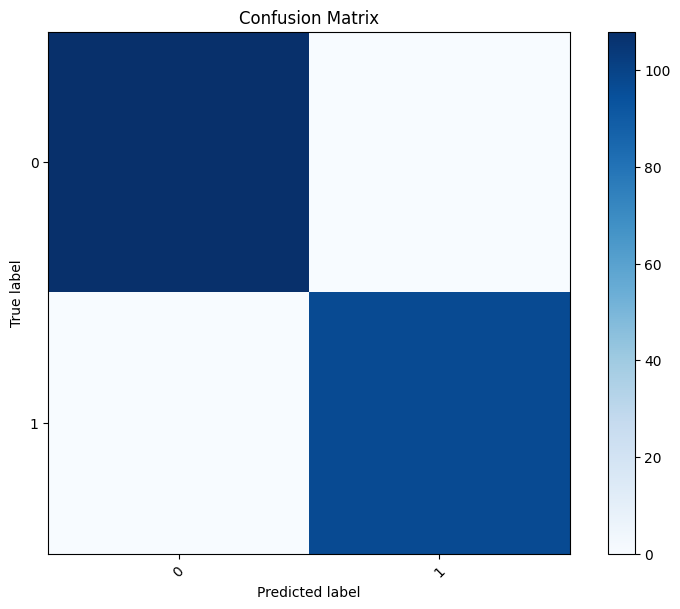

In [24]:
confusion_svm = confusion_matrix(y_test, y_pred_svm)

classes = ['0','1']

plt.figure(figsize=(8, 6))
plt.imshow(confusion_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

***Classification Report***

In [25]:
report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:")
print(report_svm)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        97

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



<h2>SVM to AdaBoost</h2>

***Model Training***

In [26]:
model = AdaBoostClassifier(estimator=svclassifier, n_estimators=50, learning_rate=1, random_state=42,algorithm='SAMME')

In [27]:
model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=SVC(C=100, gamma=1),
                   learning_rate=1, random_state=42)

***Training and Testing Accuracy***

In [28]:
train_accuracy_ada = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy_ada)

test_accuracy_ada = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy_ada)

Training Accuracy: 1.0
Testing Accuracy: 1.0


***Cross Validation***

In [29]:
cv_scores_ada = cross_val_score(model, df, y, cv=5)
print("Cross-Validated Accuracy Scores:", cv_scores_ada)
print("Mean Cross-Validated Accuracy:", cv_scores_ada.mean())

Cross-Validated Accuracy Scores: [1.         0.87317073 0.97073171 1.         0.97073171]
Mean Cross-Validated Accuracy: 0.9629268292682926


***Learning Curve for Accuracy***

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, df, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing Accuracy', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

plt.title('Learning Curves')
plt.xlabel('Number of Training Instances')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

***Learning Curve for Loss***

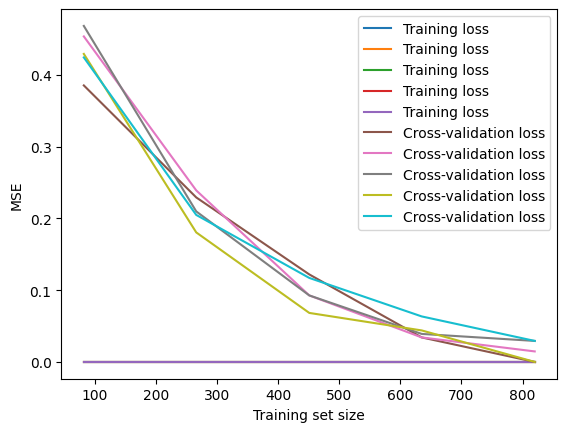

In [24]:
train_sizes, train_scores, test_scores = learning_curve(svclassifier, df, y, scoring="neg_mean_squared_error", cv=5)

plt.plot(train_sizes, -train_scores, label="Training loss")
plt.plot(train_sizes, -test_scores, label="Cross-validation loss")
plt.xlabel("Training set size")
plt.ylabel("MSE")
plt.legend()
plt.show()

***Confusion Matrix***

In [27]:
y_pred_ada=model.predict(X_test)

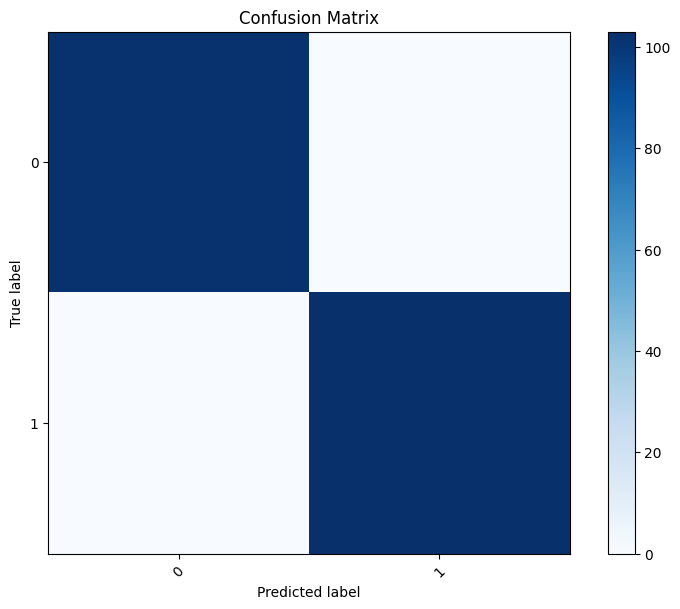

In [28]:
confusion_ada = confusion_matrix(y_test, y_pred_ada)

classes = ['0','1']

plt.figure(figsize=(8, 6))
plt.imshow(confusion_ada, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

***Classification Report***

In [29]:
report_ada = classification_report(y_test, y_pred_ada)
print("Classification Report:")
print(report_ada)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

